# Fenómeno cuántico de la radiación del cuerpo negro

El fenómeno físico que subyace un cuerpo negro consiste en la situación donde  toda la energía que incide desde el exterior sobre el presente cuerpo es absorbida, y toda la energía que incide desde el interior es emitida.

Hasta ahora no se ha hallado un cuerpo en la realidad que satisfaga las mismas condiciones a las del cuerpo negro, sin embargo para comprender el presente fenómeno se supondrá una caja completamente a oscuras pero con un pequeño orificio por donde pasan los rayos desde el exterior. Los presentes rayos son absorbidos por las paredes en múltiples reflexiones y solamente una pequeña escapa por el orificio.



In [1]:
# Import Modules
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# %load https://raw.githubusercontent.com/fisicatyc/numericos-interactivo/master/project_2014_numerical_methods/Numericos/lib/integrators/compositerules/comptraprule.py
"""
    Description: function comptraprule is part of the Composite Integration
    Techniques and can be thought as an upgrated version of Trapezoidal rule
    integration technique that aproximates a defined integal evaluated in [a,b]
    with better presicion in larger intervals. It's truncation error is of order
    h^2 and defined by a second order derivative. Similar to compmidtrule but
    request more operations Presicion is similar to Composite midpoint rule.
    Difference from the other methods is the need of only one integration interval
    therefore the number of subintervals can be even or odd.
    
    Inputs: lowerlimit - float - defines first limit of integration.
            upperlimit - float - defines last limit of integration.
            redc - integer - integer that reduces space grid in domain.
            function - function type object - evaluates f(x) at x.
            
    Outputs: integ - float - defined integral aproximation
    
    Example line: integ = comptraprule(-2, 2, 40, (lambda x: 3*x**4));
                  
    Dependencies: None.
    
    Version: 1.2 for Python 3.4
    
    Definitions were taken from:
        Richard L. Burden, J. Douglas Faires. "Numerical Analysis" 9th ed.
        "Chapter 4 - Numerical Differentiation and Integration". 
        Cengage Learning. 2010. pp: 153 - 156.
        
    Author: J.J. Cadavid - SFTC - EAFIT University.
    Contact: jcadav22@eafit.edu.co
    
    Date: 28/12/2014.
"""

def comptraprule (lowerlimit, upperlimit, redc, function):

#  Input error verification   
    if redc % 2 != 0:
        raise Exception('Reduced inverval - redc- must be an even integer');
        
    test = lambda: None;
    if isinstance(function,type(test)) == 0:
        raise Exception("function must be lambda object-type");
        
# Zero initialing        
    sumf = 0.0;
        
# Space grid size
    h = (upperlimit - lowerlimit)/redc;
 
# Main loop - Composite trapezoidal rule approximation .
    for k in range(1, redc):
        sumf = sumf + 2*function(lowerlimit + k*h);
        
    integ = 0.5*h*(sumf + function(upperlimit) + function(lowerlimit));
    
    return(integ);

## Planck's Law of Black Body radiance spectrum 

La ley de Planck permite determinar la  intensidad de la radiación emitida por un cuerpo negro acorde a las variables de temperatura y longitud de onda como se observan en la ecuación. I(k,λ) Representa la intensidad por unidad de área, unidad de tiempo y unidad de ángulo sólido.

\begin{equation}
\frac{2hc^2}{ \lambda^5(e^\frac{hc}{kT \lambda}-1)}
    \end{equation}

Donde “λ" corresponde a la longitud de onda, “T” corresponde a la temperatura del cuerpo, “h” corresponde a la constante de Planck, "c" corresponde a la velocidad de la luz y "k\"" corresponde a la constante de Boltzmann cuyo valor es igual a 1.3805·10-23 J/K.Las unidades de la intensidad se encuentran en W m-2 sr-1.

El siguiente código ilustrara en una gráfica la relación entre la intensidad de radiación y la longitud de onda, aplicando la ley de Planck. Se analizara la presente gráfica partiendo de la variación de la temperatura en el cuerpo negro, esto con el fin de comprobar computacionalmente la relación inversa que se presenta entre la temperatura y la longitud de onda, por lo que a mayores temperatura menor será el tamaño de la longitud de onda, y mayor la intensidad de radiación.

In [3]:
# Planck parameters
h = 6.62607004*10**-34;
c = 3.0*10**8;
Kb = 1.38064852*10**-23;
TemperatureVect = [500,2500,4000,5780,7250];
VectSize = len(TemperatureVect);

# Data initialization
dataSize = 50;
IntegSamples = 100 # Defines the number of samples
RadianceMat = [[0 for x in range(dataSize)] for x in range(VectSize)];
MaxDataMat = [[0 for x in range(3)] for x in range(VectSize)];
waveLengthMin = 100*10**-9;
waveLengthMax = 2000*10**-9;
waveLengthVect = np.linspace(waveLengthMin,waveLengthMax,dataSize);

# Planck's Law function
for n in range(0,VectSize):
    B = lambda waveLength: (2*h*c**2)/waveLength**5*(1/(np.exp((h*c)/(waveLength*Kb*TemperatureVect[n]))-1));
    RadianceMat[n][:] = B(waveLengthVect);
    MaxDataMat[n][2]= comptraprule(waveLengthMin, waveLengthMax, IntegSamples, B);t

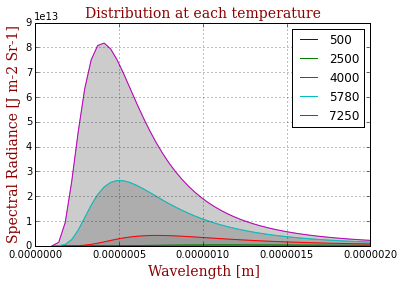

In [4]:
# Plot parameters
font = {'family' : 'serif','color'  : 'darkred', 'weight' : 'normal', 'size'   : 14};
for n in range(0,VectSize):
    plt.plot(waveLengthVect,RadianceMat[n][:], label = TemperatureVect[n],);
    plt.fill_between(waveLengthVect,RadianceMat[n][:], alpha=0.05*n, facecolor='k');
plt.axis('auto');
plt.title('Distribution at each temperature', fontdict=font); 
plt.xlabel('Wavelength [m]', fontdict=font);
plt.ylabel('Spectral Radiance [J m-2 Sr-1]', fontdict=font);
plt.grid();
plt.legend();
plt.show();

A continuación se presenta el código que ilustrara en una gráfica la relación proporcional entre la temperatura y la intensidad de radiación.

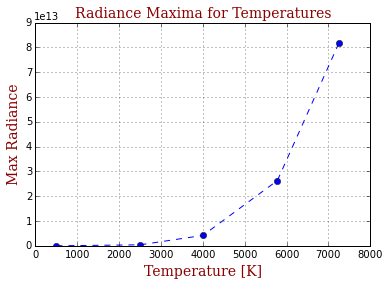

,Max Radiance WL [m],Max Radiance,Total Energy
500,2.000000e-06,2.082200e+06,0.358755
2500,1.146939e-06,3.990157e+11,445878.365127
4000,7.204082e-07,4.184867e+12,3949892.500594
5780,4.877551e-07,2.631612e+13,18902104.924807
7250,4.102041e-07,8.174296e+13,48105063.417381


In [5]:
# Data analysis
for n in range(0,VectSize):
    CurrentData = RadianceMat[n][:];
    MaxDataMat[n][0] = waveLengthVect[CurrentData.index(max(CurrentData))];
    MaxDataMat[n][1] = max(CurrentData);
    
MaxDataArry = np.asarray(MaxDataMat)
TempArry = np.asarray(TemperatureVect);

plt.plot(TemperatureVect,MaxDataArry[:,1], marker='o', linestyle='--', color='b');
plt.axis('auto');
plt.title('Radiance Maxima for Temperatures', fontdict=font); 
plt.xlabel('Temperature [K]', fontdict=font);
plt.ylabel('Max Radiance', fontdict=font);
plt.grid();
plt.show();
  
Frame = pd.DataFrame(MaxDataMat,index=TemperatureVect, columns=['Max Radiance WL [m]','Max Radiance','Total Energy']);
Frame

## Gradient Dertmination of maximum radiance temperature

In [6]:
# %load https://raw.githubusercontent.com/fisicatyc/numericos-interactivo/master/project_2014_numerical_methods/Numericos/lib/differentiators/centraldiff/FCDA.py
#!/usr/bin/python
"""
    Description: class centraldiff defines a set of numerical methods based on
    finite differences of central step. Capable of aproximating derivatives at
    a given point inside an interval. Central step does not evaluate derivatives
    at endpoints. Precision is highly dependant on interval size, bigger intervals
    lead to highter truncation errors. Minor error types are of h^2 order.
    Analitical errors can be calculated using fourth derivatives. Highter
    derivative orders can lead to high truncation errors, so results are likely
    to differ a lot from analytical results, especially with interpolated data.
   
    FCDA or First Centered Difference Aproximation, calculates the first
    derivative in the interval. Dependencies: testlambda, getarray.  
    
    Method inputs: n - integer - Defines number of n+1 elements in list.
                   lowerlimit - float - first term of interval.
                   upperlimit - float - last term of interval.
                   function - function type object - evaluates f(x) at x.
                   
    Method output: diff_array - list - list of derivated values in (a,b).              
    
    call sequence example: centraldiff.FCDA(4, 0, 2, (lambda x: 4*sin(x)**2));
                  
    Dependencies: None.
    
    Version: 1.2 for Python 3.4
    
    Definitions are taken from:
        Jaan Kiusalaasr. "Numerical Methods in Engineering With Python 3".
        3th ed. "Chapter 5 - Numerical Differentiation". 
        Cambridge University Press. 2013. PP. 183 - 185.
        
    Author: J.J. Cadavid - SFTC - EAFIT University.
    Contact: jcadav22@eafit.edu.co
    
    Date: 28/12/2014.
"""

def FCDA(n,lowerlimit, upperlimit, function, x, flag = False):
    test = lambda: None;
    if isinstance(function,type(test)) == 0:
        raise Exception("function must be lambda object-type");
     
    h = upperlimit-lowerlimit;
    
    if flag:
        hc = h/(n-1);
        arrayStart = lowerlimit;
        x_array = [arrayStart + hc*x for x in range(n)];
        diff_array = [0]*n;             
    
        for i in range(n):
            diff_array[i] = (function(x_array[i] + h) - \
                        function(x_array[i] - h))/2*h;
    else:
        diff_array = (function(x + h) - \
                        function(x - h))/2*h;
    return(diff_array);

In [7]:
DerivMat = [[0 for x in range(dataSize)] for x in range(VectSize)];
# First derivative for each Planck's Law at different temperatures
for n in range(0,VectSize):
    DB = lambda waveLength: (2*h*c**2)/waveLength**5*(1/(np.exp((h*c)/(waveLength*Kb*TemperatureVect[n]))-1));
    for b in range(0,dataSize-1):
        DerivMat[n][b] = FCDA(n, waveLengthVect[b], waveLengthVect[b+1],DB,waveLengthVect[b]);

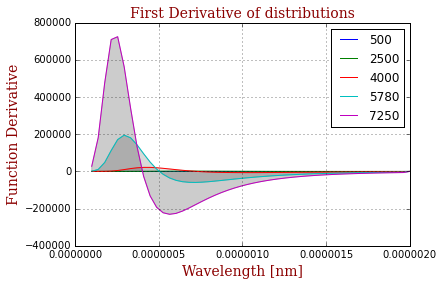

In [8]:
for n in range(0,VectSize):
    plt.plot(waveLengthVect,DerivMat[n][:], label = TemperatureVect[n],);
    plt.fill_between(waveLengthVect,DerivMat[n][:], alpha=0.05*n, facecolor='k');
plt.axis('auto');
plt.title('First Derivative of distributions', fontdict=font); 
plt.xlabel('Wavelength [nm]', fontdict=font);
plt.ylabel('Function Derivative', fontdict=font);
plt.grid();
plt.legend();
plt.show();

In [9]:
# Find Derivative Zeros - all zeros are assumed to be between global maximum and minimum
MinDataMat = [[0 for x in range(2)] for x in range(VectSize)];

# Loop to find individual maximum at each temperature
CurrentMax = 0;
for n in range(0,VectSize):
    CurrentData = DerivMat[n][:];
    MaxIndex = CurrentData.index(max(CurrentData));
    MinIndex = CurrentData.index(min(CurrentData));
    TGTIntval = DerivMat[n][MaxIndex:MinIndex]
    IntvalMin = min(abs(i) for i in TGTIntval)
    try:
        a = CurrentData.index(IntvalMin);

    except: 
        a = CurrentData.index(-IntvalMin);
    MinDataMat[n][0] = waveLengthVect[a];
    MinDataMat[n][1] = RadianceMat[n][a]
    CurrentData = RadianceMat[n][a];
    
     
    if CurrentMax < CurrentData:
        MaxRadiance =  RadianceMat[n][a];
        MaxWlength = waveLengthVect[a];
        Temperature = TemperatureVect[n];
    else:
        CurrentMax = RadianceMat[n][a];
        
print("The Black Body with Temperature: %s, has the Maximum radiance: %s which is reached at Wavelength: %s." %(Temperature,MaxRadiance,MaxWlength))

FrameB = pd.DataFrame(MinDataMat,index=TemperatureVect, columns=['Max Radiance WL [m]','Max Radiance']);
FrameB

The Black Body with Temperature: 7250, has the Maximum radiance: 8.17429629438e+13 which is reached at Wavelength: 4.10204081633e-07.


,Max Radiance WL [m],Max Radiance
500,1.961224e-06,1.727468e+06
2500,1.146939e-06,3.990157e+11
4000,7.204082e-07,4.184867e+12
5780,4.877551e-07,2.631612e+13
7250,4.102041e-07,8.174296e+13


## Linear Regression & Wein's Displacement Law

La ley de desplazamiento de Wien permite calcular la posición del espectro máximo en un cuerpo negro. Una ley que refleja de manera operacional la relación inversa existente entre la temperatura y la longitud de onda, del cual confirma que ha mayor temperatura menor la longitud de onda que emite. Matemáticamente la ley se expresa de la siguiente manera.

\begin{equation}
{\lambda }_{max}=\frac{0,0028976}{T}
\end{equation}

Donde “T” corresponde a la temperatura del cuerpo y "lambda" corresponde a la longitud de onda en el pico máxima del espectro de emisión.

El siguiente código que se presenta a continuación, ilustra en una gráfica la relación inversa entre la temperatura (coordenada x) y la longitud de onda (coordenada Y).


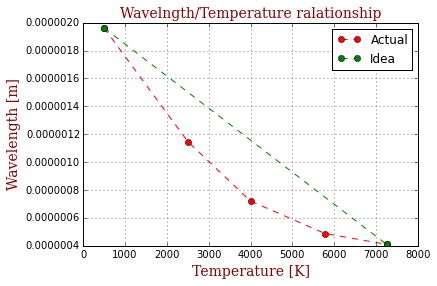

In [10]:
MinDataArry = np.asarray(MinDataMat);
plt.plot(TemperatureVect,MinDataArry[:,0], marker='o', linestyle='--', color='r',label='Actual');
plt.plot([TemperatureVect[0],TemperatureVect[VectSize-1]],[MinDataArry[0,0],MinDataArry[VectSize-1,0]], marker='o', linestyle='--', color='g',label='Idea');
plt.axis('auto');
plt.title('Wavelngth/Temperature ralationship', fontdict=font); 
plt.xlabel('Temperature [K]', fontdict=font);
plt.ylabel('Wavelength [m]', fontdict=font);
plt.grid();
plt.legend();
plt.show();

In [11]:
# Defining the parameters of fitting curve - A linear polynomial
Tmean = sum(TempArry)/VectSize;
WLmean = sum(MinDataArry[:,0])/VectSize;
SqrTemp = sum(TempArry**2);

SigmaX = np.sqrt(1/VectSize*sum(TempArry - Tmean)**2);
SigmaY = np.sqrt(1/VectSize*sum(MinDataArry[:,0] - WLmean)**2);

# Round-off susceptible fit
ar = (WLmean*SqrTemp - Tmean* sum(TempArry*MinDataArry[:,0]))/(SqrTemp-VectSize*Tmean**2);
br = (sum(TempArry*MinDataArry[:,0]) - Tmean*sum(MinDataArry[:,0]) )/(SqrTemp-VectSize*Tmean**2);
Yr = lambda Temp: ar + br*Temp;

# Less Round-off susceptible fit
b = sum(MinDataArry[:,0]*(TempArry - Tmean))/sum(TempArry*(TempArry - Tmean));
a = WLmean - Tmean*b;
Y = lambda Temp: a + b*Temp;

# Wein's Displacement Law:
WLw = lambda Temp: 2.89776829e-3/Temp; # [m]K/K

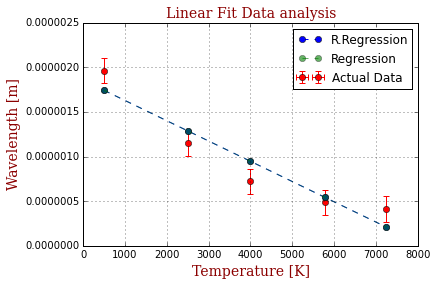

In [12]:
# Plot regression results
DataScale = 10e14;
plt.errorbar(TempArry,MinDataArry[:,0], xerr=SigmaX*DataScale, yerr=SigmaY*DataScale,fmt='o', color='r', capthick=1,label='Actual Data');
plt.plot(TempArry,Yr(TempArry), marker='o', linestyle='--', color='b',label='R.Regression');
plt.plot(TempArry,Y(TempArry), marker='o', linestyle='--', color='g',label='Regression',alpha=0.6);
         
plt.title('Linear Fit Data analysis', fontdict=font); 
plt.xlabel('Temperature [K]', fontdict=font);
plt.ylabel('Wavelength [m]', fontdict=font);
plt.grid();
plt.legend();
plt.show();

Para obtener la función que corresponda al pico del espectro máximo se debe proceder a realizar cálculos con valores diferentes de temperatura y luego representar los logaritmos de las longitudes de onda obtenidas, para comprobar a una aproximación lineal, y mediante una recta de regresión lineal de los presentes datos obtener el valor de las constante b en el origen de la recta. 

La recta de regresión se expresa de la siguiente manera.

\begin{equation}
\ln ({\lambda }_{max})=(14,8795-1)\ln (T)
\end{equation}

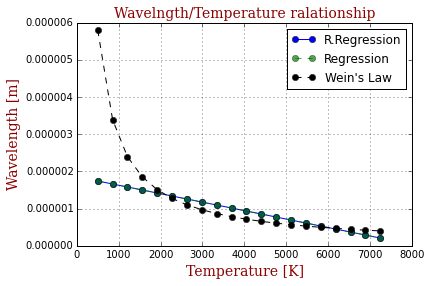

In [13]:
# Temperature array
TempData = np.linspace(min(TempArry),max(TempArry),20);

# Plot Data
plt.plot(TempData,Yr(TempData), marker='o', linestyle='-', color='b',label='R.Regression');
plt.plot(TempData,Y(TempData), marker='o', linestyle='--', color='g',label='Regression',alpha=0.7);
plt.plot(TempData,WLw(TempData), marker='o', linestyle='--', color='k',label="Wein's Law");
plt.axis('auto');
plt.title('Wavelngth/Temperature ralationship', fontdict=font); 
plt.xlabel('Temperature [K]', fontdict=font);
plt.ylabel('Wavelength [m]', fontdict=font);
plt.grid();
plt.legend();
plt.show();

## Rayleigh-Jeans Interpolation & Comparison

La ley de Raleigh-jean consiste en describir la radiación espectral de un cuerpo negro a una temperatura dada y variando las longitudes de ondas. A continuación se expresa matemáticamente la presente ley.

\begin{equation}
B=\frac{2ckT}{{\lambda }^{4}}
\end{equation}

Donde “K” corresponde a la constante de Boltzmann, “T” a la temperatura del cuerpo negro, “c” corresponde a la velocidad de la luz y “λ” corresponde a la longitud de onda.

In [14]:
## module newtonPoly - From Numerical Methods in Engineering with Python 3 by Jaan Kiusalass - Cambridge Press - 2013.
"""
p = evalPoly(a,xData,x).
Evaluates Newton’s polynomial p at x. The coefficient
vector {a} can be computed by the function ’coeffts.

a = coeffts(xData,yData).
Computes the coefficients of Newton’s polynomial.
"""
def evalPoly(a,xData,x):
    n = len(xData) - 1 # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p

def coeffts(xData,yData):
    m = len(xData) # Number of data points
    a = yData.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
    return a

In [15]:
# Fixed temperature
FxdTemp = 4000; #[K]
WLSet = [1.146939e-5,4.146939e-06,6.204082e-07,1e-18];
SetSize = len(WLSet);
FxdData = [[0 for x in range(2)] for x in range(SetSize)];

BF = lambda waveLength: (2*h*c**2)/waveLength**5*(1/(np.exp((h*c)/(waveLength*Kb*FxdTemp))-1));

for n in range(SetSize):
    FxdData[n][0] = WLSet[n];
    FxdData[n][1] = BF(WLSet[n]);
    
FxdDataArry = np.asarray(FxdData);

In [16]:
# Compute interpolant coefficients and polynomial
Coeff = coeffts(FxdDataArry[:,0],FxdDataArry[:,1]);
PolyData = [0]*dataSize;
print("Polynomial coefficients: %s" %(Coeff));

# Evaluate set with polynomial
WLSet = np.linspace(WLSet[0],WLSet[SetSize-1],dataSize)
for n in range(dataSize):
    PolyData[n] = evalPoly(Coeff,FxdDataArry[:,0],WLSet[n]);
    
# Rayleigh-Jeans Law
BRJ = lambda waveLength: (2*c*Kb*FxdTemp)/waveLength**4;

Polynomial coefficients: [  1.63006572e+09  -9.38689237e+15   1.00112532e+23   1.65069346e+29]


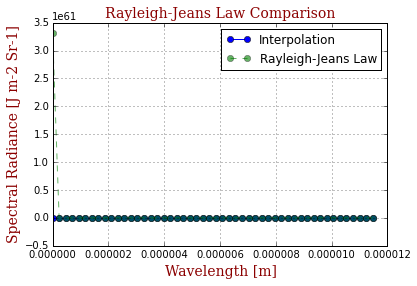

In [17]:
# Plot Data
plt.plot(WLSet,PolyData, marker='o', linestyle='-', color='b',label='Interpolation');
plt.plot(WLSet,BRJ(WLSet), marker='o', linestyle='--', color='g',label='Rayleigh-Jeans Law',alpha=0.6);
plt.axis('auto');
plt.title('Rayleigh-Jeans Law Comparison', fontdict=font); 
plt.xlabel('Wavelength [m]', fontdict=font);
plt.ylabel('Spectral Radiance [J m-2 Sr-1]', fontdict=font);
plt.grid();
plt.legend();
plt.show();

## Resources

1.	Estudio de la radiación del cuerpo negro. Determinación de la constante de Wien. [Citado el 9 de noviembre del 2015] [en línea]. http://www.rafaelzamora.es/radiacion_cuerpo_negro.pdf
2.	ley de Rayleigh-Jeans. [Citado el 9 de noviembre del 2015] [en línea]. https://es.wikipedia.org/wiki/Ley_de_Rayleigh-Jeans
3.	La radiación de cuerpo negro. [Citado el 10 de noviembre del 2015] [en línea].http://www.sc.ehu.es/sbweb/fisica/cuantica/negro/radiacion/radiacion.htm
4.	Radiación de cuerpo negro. [Citado el 10 de noviembre del 2015] [en línea]. http://astro.if.ufrgs.br/levato/cuerponegro1/
5.	 Radiación de cuerpo negro. [Citado el 10 de noviembre del 2015] [en línea]. http://www.sc.ehu.es/sbweb/fisica3/solar/radiacion/radiacion.html
